In [ ]:
#Importacao ds bibliotecas e leitura do dataset

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay)
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

df = pd.read_csv('mushrooms.csv') #le o dataset
display(df.head()) #mostra as 5 primeiras amostras

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [54]:
#---------------Imprimindo os dados das colunas---------------#
colum_names = df.columns
for name in colum_names: #verifica o balanceamento do dataset para cada feature
    print('============================================')
    print(df[name].value_counts())
#--------------------------------------------------------------#

class
e    4208
p    3916
Name: count, dtype: int64
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64
bruises
f    4748
t    3376
Name: count, dtype: int64
odor
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64
gill-attachment
f    7914
a     210
Name: count, dtype: int64
gill-spacing
c    6812
w    1312
Name: count, dtype: int64
gill-size
b    5612
n    2512
Name: count, dtype: int64
gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: count, dtype: int64
stalk-shape
t    4608
e    3516
Name: count, dtype: int64
stalk-root
b    3776
?    2480
e    1120
c     556
r     192
Name: coun

In [55]:
#------Verificando se existem colunas com dados faltantes------#
print("Dados faltantes em cada feature:")
print(df.isnull().sum())
#--------------------------------------------------------------#

Dados faltantes em cada feature:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [56]:
#----------------------Remocao de colunas----------------------#
df = df.drop('veil-type', axis=1)   #removendo coluna com feature identica para todas amostras
print("Dimensões do dataset após a remoção:", df.shape) #imprime as dimensoes novas (num_linhas, num_colunas antigo - 1)

# p = poisonous (venenoso), e = edible (comestível)
y = df['class'] #a coluna 'class' eh o alvo (label)
X = df.drop('class', axis=1) # X são as features

print("Label 'y' separado:")
print(y.head())
print("Features 'X' separadas:")
display(X.head())
#--------------------------------------------------------------#

Dimensões do dataset após a remoção: (8124, 22)
Label 'y' separado:
0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object
Features 'X' separadas:


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,s,w,w,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,s,w,w,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,s,w,w,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,s,w,w,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,s,w,w,w,o,e,n,a,g


In [57]:
#---------------------Codificacao do alvo---------------------#
le        = LabelEncoder() #codificador para tornar as caracteristicas de string para vetor one-hot
y_encoded = le.fit_transform(y) #aplica a codificação em y

#'e' -> 0, 'p' -> 1
print(f"Labels originais: {le.classes_}")
print(f"Labels codificados: {np.unique(y_encoded)}")
print("Exemplo dos 5 primeiros labels codificados:", y_encoded[:5])
#--------------------------------------------------------------#

Labels originais: ['e' 'p']
Labels codificados: [0 1]
Exemplo dos 5 primeiros labels codificados: [1 0 0 1 0]


In [58]:
#-------------------Codificacao das features-------------------#
X_encoded = pd.get_dummies(X) #aplica one-hot encoding em todas features

print("Dimensões de X após o One-Hot Encoding:", X_encoded.shape)
print("Amostra das features codificadas:")
display(X_encoded.head())
#--------------------------------------------------------------#

Dimensões de X após o One-Hot Encoding: (8124, 116)
Amostra das features codificadas:


,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


In [59]:
k = 6 #numero de particoes usadas no cross validation

--------------Resultados naive bayes-------------- 

Acurácia geral: 88.10% 

              precision    recall  f1-score   support

  Comestível       0.87      0.90      0.89      4208
    Venenoso       0.89      0.86      0.87      3916

    accuracy                           0.88      8124
   macro avg       0.88      0.88      0.88      8124
weighted avg       0.88      0.88      0.88      8124


Matriz de Confusão (Naive Bayes)



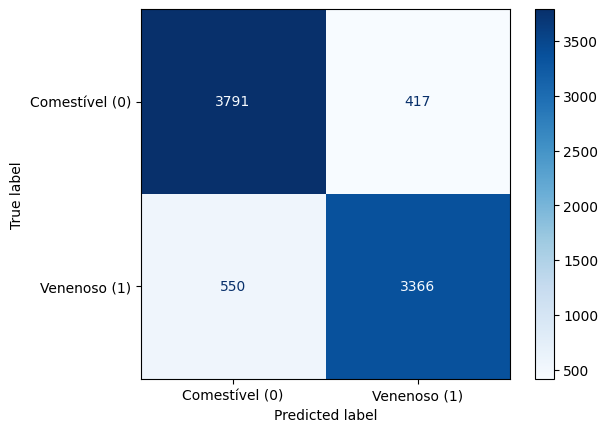

In [60]:
#-------------------Aplicacao do naive bayes-------------------#
#Uso de BernoulliNB pois as features sao binarias (0s e 1s) apos o one-hot encoding
model_nb = BernoulliNB()

#validacao cruzada
y_pred_nb_cv = cross_val_predict(model_nb, X_encoded, y_encoded, cv=k)
accuracy = accuracy_score(y_encoded, y_pred_nb_cv)
#--------------------------------------------------------------#

#---------------------Exibe os resultados---------------------#
target_names = ['Comestível (0)', 'Venenoso (1)']

print("--------------Resultados naive bayes-------------- \n")
print(f"Acurácia geral: {accuracy:.2%} \n")
print(classification_report(y_encoded, y_pred_nb_cv, target_names=['Comestível', 'Venenoso']))

print("\nMatriz de Confusão (Naive Bayes)\n")
cm   = confusion_matrix(y_encoded, y_pred_nb_cv)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()
#--------------------------------------------------------------#


 --------------Resultados SVM-------------- 

Acurácia geral: 94.58% 

                precision    recall  f1-score   support

Comestível (0)       0.94      0.96      0.95      4208
  Venenoso (1)       0.95      0.93      0.94      3916

      accuracy                           0.95      8124
     macro avg       0.95      0.95      0.95      8124
  weighted avg       0.95      0.95      0.95      8124


Matriz de Confusão (SVM)



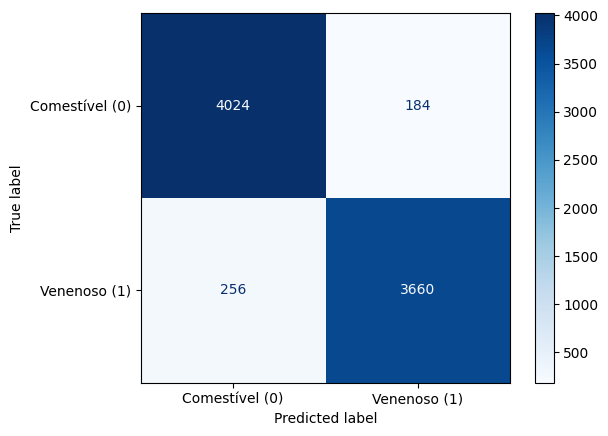

In [61]:
#-----------------------Aplicacao do SVM-----------------------#
#SVC (Support Vector Classifier)
model_svm = SVC(kernel='rbf', random_state=42)

#validacao cruzada
y_pred_svm_cv = cross_val_predict(model_svm, X_encoded, y_encoded, cv=k)
accuracy_svm  = accuracy_score(y_encoded, y_pred_svm_cv)
#--------------------------------------------------------------#

#---------------------Exibe os resultados---------------------#
print("\n --------------Resultados SVM-------------- \n")
print(f"Acurácia geral: {accuracy_svm:.2%} \n")
print(classification_report(y_encoded, y_pred_svm_cv, target_names=['Comestível (0)', 'Venenoso (1)']))

print("\nMatriz de Confusão (SVM)\n")
cm   = confusion_matrix(y_encoded, y_pred_svm_cv)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()
#--------------------------------------------------------------#